### Exercise 1   

If you use Jupyter, load [chap02.ipynb](./chap02.ipynb) and try out the examples. You can also view the notebook at http://tinyurl.com/thinkdsp02.

### Exercise 2   

A [sawtooth signal](http://en.wikipedia.org/wiki/Sawtooth_wave) has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

![](https://upload.wikimedia.org/wikipedia/commons/8/82/Sawtooth-td_and_fd.png)


- The piecewise linear function

$ x(t)=t-\underbrace {\lfloor t\rfloor } _{\operatorname {floor} (t)}$, 

based on the `floor function` of time t


- or equivalently,

$ x(t)=t{\pmod {1.0}}$, 

is an example of a sawtooth wave with period 1.0

----

In [6]:
from thinkdsp import Sinusoid
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        θ= ts * 2 * np.pi * self.freq + self.offset 
        θ= θ % (np.pi * 2) 
        x= -1 + θ/np.pi        
        x= x * self.amp 
        return x
    
class SqrSignal(Sinusoid):   
    def evaluate(self, ts):
        θ= ts * 2 * np.pi * self.freq + self.offset 
        θ= θ % (np.pi * 2) 
        x0= -1 
        x1= +1 
        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) 
        x= x * self.amp 
        return x  

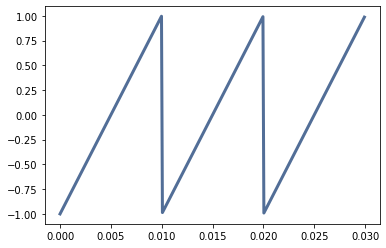

In [7]:
x= SawtoothSignal(freq=100)
x.plot()

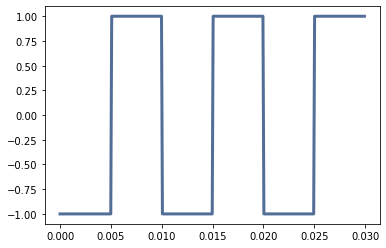

In [8]:
w= SqrSignal(freq=100)
w.plot()

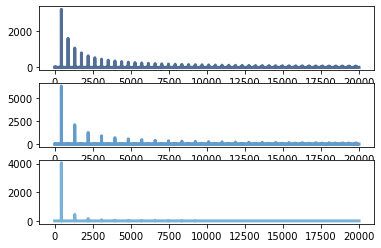

In [9]:
import matplotlib.pyplot as pl
import thinkdsp

pl.subplot(311)
sawtooth = SawtoothSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
sawtooth.make_spectrum().plot()
sawtooth.make_audio()

pl.subplot(312)
square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()

pl.subplot(313)

tri = thinkdsp.TriangleSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
tri.make_spectrum().plot()

### Exercise 3   

Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

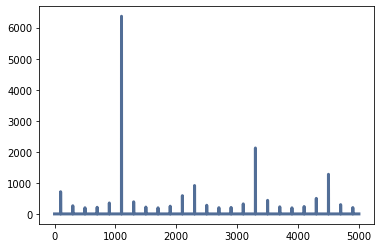

In [10]:
import thinkdsp as td

xSqr= td.SquareSignal(freq=1100)
wSqr= xSqr.make_wave(framerate=10000)
sSqr= wSqr.make_spectrum()
sSqr.plot()
wSqr.make_audio()

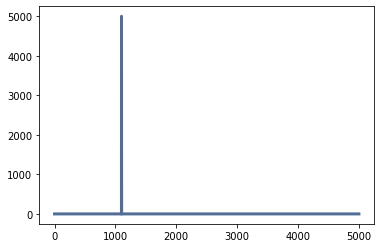

In [11]:
x= td.CosSignal(freq=1100) 
w= x.make_wave(framerate=10000)
s= w.make_spectrum()
s.plot()
w.make_audio()

### Exercise 4   

If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?
Try this experiment:

Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
Set spectrum.hs[0] = 100. What effect does this operation have on the waveform? Hint: Spectrum provides a method called make_wave that computes the Wave that corresponds to the Spectrum.

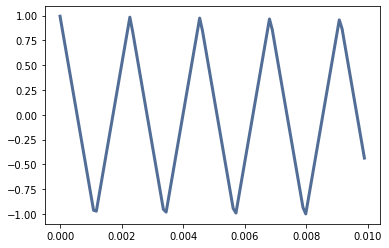

In [15]:
triangle = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.01)
triangle.plot()

In [16]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0658141036401503e-14+0j)

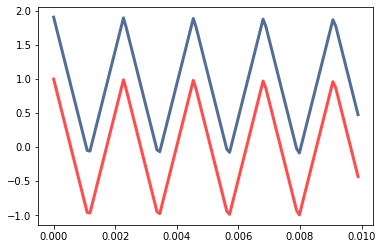

In [18]:
spectrum.hs[0] = 100
triangle.plot(color='red')
spectrum.make_wave().plot()

### Exercise 5   

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.

Compute the Spectrum and plot it.

Modify the Spectrum using your function and plot it again.

Use Spectrum.make_wave to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?

In [19]:
def Sean_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

In [38]:
x= SawtoothSignal(freq=1100).make_wave(duration=0.5)
x.make_audio()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


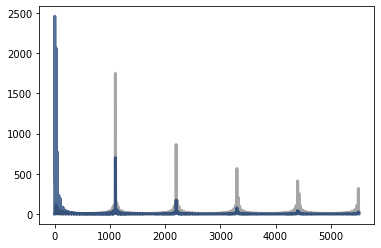

In [39]:

spectrum = x.make_spectrum()
spectrum.plot(color='gray')
Sean_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=high)



In [40]:
y = spectrum.make_wave()
y.make_audio()

### Exercise 6   

Triangle and square waves have odd harmonics only; 
the sawtooth wave has both even and odd harmonics. 

The harmonics of the square and sawtooth waves drop off in proportion to 1/f; 
the harmonics of the triangle wave drop off like $1/f^2$. 

Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

- Hint: There are two ways you could approach this: 
    - you could construct the signal you want by adding up sinusoids, 
    - or you could start with a signal that is similar to what you want and modify it.

In [41]:
freq = 1100
St_signal = thinkdsp.SawtoothSignal(freq=freq)
wave = St_signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

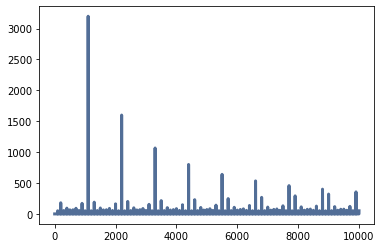

In [42]:
St_spectrum = wave.make_spectrum()
St_spectrum.plot()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


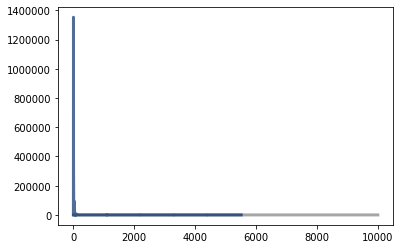

In [43]:
St_spectrum.plot(color='gray')
Sean_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

